In [1]:
#Importing required modules and data

import pandas as pd
import numpy as np
#import sklearn as sk
import re as re
data_frame = pd.read_csv(r'C:\Users\hp\Desktop\Big_data_assignment-1\LaptopPricePrediction.csv')
data_frame.head()

Unnamed: 0                                               Name  \
0           0  Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...   
1           1  Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...   
2           2  HP Pentium Quad Core - (8 GB/256 GB SSD/Window...   
3           3  HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...   
4           4  HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...   

                            Processor            RAM  \
0  Intel Core i5 Processor (10th Gen)  8 GB DDR4 RAM   
1  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
2   Intel Pentium Quad Core Processor  8 GB DDR4 RAM   
3  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
4      AMD Athlon Dual Core Processor  4 GB DDR4 RAM   

                     Operating System     Storage  \
0  64 bit Windows 10 Operating System    1 TB HDD   
1  64 bit Windows 10 Operating System  256 GB SSD   
2  64 bit Windows 10 Operating System  256 GB SSD   
3  64 bit Windows 10 Operating System  256 GB SSD   
4  64 bit Windows 10 Operating System    1 TB HDD   

                        Display                Warranty    Price  rating  
0  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty  ₹43,990     3.9  
1    35.56 cm (14 Inch) Display  1 Year Onsite Warranty  ₹43,990     4.2  
2    35.56 cm (14 inch) Display  1 Year Onsite Warranty  ₹31,490     4.6  
3    35.56 cm (14 inch) Display  1 Year Onsite Warranty  ₹40,990     4.1  
4  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty  ₹27,490     4.1

In [2]:
#removing the Unnamed column
data_frame.drop(data_frame.columns[data_frame.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data_frame.head()

Name  \
0  Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...   
1  Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...   
2  HP Pentium Quad Core - (8 GB/256 GB SSD/Window...   
3  HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...   
4  HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...   

                            Processor            RAM  \
0  Intel Core i5 Processor (10th Gen)  8 GB DDR4 RAM   
1  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
2   Intel Pentium Quad Core Processor  8 GB DDR4 RAM   
3  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
4      AMD Athlon Dual Core Processor  4 GB DDR4 RAM   

                     Operating System     Storage  \
0  64 bit Windows 10 Operating System    1 TB HDD   
1  64 bit Windows 10 Operating System  256 GB SSD   
2  64 bit Windows 10 Operating System  256 GB SSD   
3  64 bit Windows 10 Operating System  256 GB SSD   
4  64 bit Windows 10 Operating System    1 TB HDD   

                        Display                Warranty    Price  rating  
0  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty  ₹43,990     3.9  
1    35.56 cm (14 Inch) Display  1 Year Onsite Warranty  ₹43,990     4.2  
2    35.56 cm (14 inch) Display  1 Year Onsite Warranty  ₹31,490     4.6  
3    35.56 cm (14 inch) Display  1 Year Onsite Warranty  ₹40,990     4.1  
4  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty  ₹27,490     4.1

In [3]:
# removing the rupee symbol from the price column
data_frame['Price'] = data_frame['Price'].str.replace(',', '')
data_frame['Price'] = data_frame['Price'].str.replace('₹', '')
data_frame.head(10)

Name  \
0  Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...   
1  Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...   
2  HP Pentium Quad Core - (8 GB/256 GB SSD/Window...   
3  HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...   
4  HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...   
5  Lenovo IdeaPad 3 Core i5 10th Gen - (8 GB/1 TB...   
6  HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (...   
7  acer Predator Helios 300 Core i7 10th Gen - (1...   
8  ASUS VivoBook 15 Core i3 10th Gen - (8 GB/1 TB...   
9  HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...   

                            Processor             RAM  \
0  Intel Core i5 Processor (10th Gen)   8 GB DDR4 RAM   
1  Intel Core i3 Processor (11th Gen)   8 GB DDR4 RAM   
2   Intel Pentium Quad Core Processor   8 GB DDR4 RAM   
3  Intel Core i3 Processor (11th Gen)   8 GB DDR4 RAM   
4      AMD Athlon Dual Core Processor   4 GB DDR4 RAM   
5  Intel Core i5 Processor (10th Gen)   8 GB DDR4 RAM   
6     AMD Ryzen 5 Quad Core Processor   8 GB DDR4 RAM   
7  Intel Core i7 Processor (10th Gen)  16 GB DDR4 RAM   
8  Intel Core i3 Processor (10th Gen)   8 GB DDR4 RAM   
9     AMD Ryzen 3 Dual Core Processor   8 GB DDR4 RAM   

                     Operating System              Storage  \
0  64 bit Windows 10 Operating System             1 TB HDD   
1  64 bit Windows 10 Operating System           256 GB SSD   
2  64 bit Windows 10 Operating System           256 GB SSD   
3  64 bit Windows 10 Operating System           256 GB SSD   
4  64 bit Windows 10 Operating System             1 TB HDD   
5  64 bit Windows 10 Operating System             1 TB HDD   
6  64 bit Windows 10 Operating System             1 TB HDD   
7  64 bit Windows 10 Operating System  1 TB HDD|256 GB SSD   
8  64 bit Windows 10 Operating System             1 TB HDD   
9  64 bit Windows 10 Operating System             1 TB HDD   

                        Display                Warranty   Price  rating  
0  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   43990     3.9  
1    35.56 cm (14 Inch) Display  1 Year Onsite Warranty   43990     4.2  
2    35.56 cm (14 inch) Display  1 Year Onsite Warranty   31490     4.6  
3    35.56 cm (14 inch) Display  1 Year Onsite Warranty   40990     4.1  
4  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   27490     4.1  
5  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   42990     4.2  
6  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   50990     4.5  
7  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty  116990     4.1  
8  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   37990     4.2  
9  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   36990     4.4

In [4]:
# removing the text the from the all rows of the ram column,so that we can treat it as number data.
data_frame["RAM"] = data_frame.RAM.str.replace('\s.*','')

data_frame.head(10)

<ipython-input-4-b908b221f191>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame["RAM"] = data_frame.RAM.str.replace('\s.*','')


Name  \
0  Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...   
1  Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...   
2  HP Pentium Quad Core - (8 GB/256 GB SSD/Window...   
3  HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...   
4  HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...   
5  Lenovo IdeaPad 3 Core i5 10th Gen - (8 GB/1 TB...   
6  HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (...   
7  acer Predator Helios 300 Core i7 10th Gen - (1...   
8  ASUS VivoBook 15 Core i3 10th Gen - (8 GB/1 TB...   
9  HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...   

                            Processor RAM                    Operating System  \
0  Intel Core i5 Processor (10th Gen)   8  64 bit Windows 10 Operating System   
1  Intel Core i3 Processor (11th Gen)   8  64 bit Windows 10 Operating System   
2   Intel Pentium Quad Core Processor   8  64 bit Windows 10 Operating System   
3  Intel Core i3 Processor (11th Gen)   8  64 bit Windows 10 Operating System   
4      AMD Athlon Dual Core Processor   4  64 bit Windows 10 Operating System   
5  Intel Core i5 Processor (10th Gen)   8  64 bit Windows 10 Operating System   
6     AMD Ryzen 5 Quad Core Processor   8  64 bit Windows 10 Operating System   
7  Intel Core i7 Processor (10th Gen)  16  64 bit Windows 10 Operating System   
8  Intel Core i3 Processor (10th Gen)   8  64 bit Windows 10 Operating System   
9     AMD Ryzen 3 Dual Core Processor   8  64 bit Windows 10 Operating System   

               Storage                       Display                Warranty  \
0             1 TB HDD  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   
1           256 GB SSD    35.56 cm (14 Inch) Display  1 Year Onsite Warranty   
2           256 GB SSD    35.56 cm (14 inch) Display  1 Year Onsite Warranty   
3           256 GB SSD    35.56 cm (14 inch) Display  1 Year Onsite Warranty   
4             1 TB HDD  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   
5             1 TB HDD  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   
6             1 TB HDD  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   
7  1 TB HDD|256 GB SSD  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   
8             1 TB HDD  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   
9             1 TB HDD  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty   

    Price  rating  
0   43990     3.9  
1   43990     4.2  
2   31490     4.6  
3   40990     4.1  
4   27490     4.1  
5   42990     4.2  
6   50990     4.5  
7  116990     4.1  
8   37990     4.2  
9   36990     4.4

In [5]:
# removing the text the from the all rows of the Warranty column.
# so that we can treat it as number data.
data_frame["Warranty"] = data_frame.Warranty.str.replace('\s.*','')
data_frame.head()

<ipython-input-5-de5e565648db>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame["Warranty"] = data_frame.Warranty.str.replace('\s.*','')


Name  \
0  Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...   
1  Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...   
2  HP Pentium Quad Core - (8 GB/256 GB SSD/Window...   
3  HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...   
4  HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...   

                            Processor RAM                    Operating System  \
0  Intel Core i5 Processor (10th Gen)   8  64 bit Windows 10 Operating System   
1  Intel Core i3 Processor (11th Gen)   8  64 bit Windows 10 Operating System   
2   Intel Pentium Quad Core Processor   8  64 bit Windows 10 Operating System   
3  Intel Core i3 Processor (11th Gen)   8  64 bit Windows 10 Operating System   
4      AMD Athlon Dual Core Processor   4  64 bit Windows 10 Operating System   

      Storage                       Display Warranty  Price  rating  
0    1 TB HDD  39.62 cm (15.6 inch) Display        1  43990     3.9  
1  256 GB SSD    35.56 cm (14 Inch) Display        1  43990     4.2  
2  256 GB SSD    35.56 cm (14 inch) Display        1  31490     4.6  
3  256 GB SSD    35.56 cm (14 inch) Display        1  40990     4.1  
4    1 TB HDD  39.62 cm (15.6 inch) Display        1  27490     4.1

In [6]:
#droping irrelevant column such as operating system. Becuase it is same for every laptop.
# droping rating becuase it is no where correlated with price.

data_frame.drop(['rating', 'Operating System'], axis = 1, inplace = True)
data_frame.head()

Name  \
0  Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...   
1  Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...   
2  HP Pentium Quad Core - (8 GB/256 GB SSD/Window...   
3  HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...   
4  HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...   

                            Processor RAM     Storage  \
0  Intel Core i5 Processor (10th Gen)   8    1 TB HDD   
1  Intel Core i3 Processor (11th Gen)   8  256 GB SSD   
2   Intel Pentium Quad Core Processor   8  256 GB SSD   
3  Intel Core i3 Processor (11th Gen)   8  256 GB SSD   
4      AMD Athlon Dual Core Processor   4    1 TB HDD   

                        Display Warranty  Price  
0  39.62 cm (15.6 inch) Display        1  43990  
1    35.56 cm (14 Inch) Display        1  43990  
2    35.56 cm (14 inch) Display        1  31490  
3    35.56 cm (14 inch) Display        1  40990  
4  39.62 cm (15.6 inch) Display        1  27490

In [7]:
data_frame["Price"] = data_frame["Price"].astype(str).astype(int)
print(data_frame.dtypes)

Name         object
Processor    object
RAM          object
Storage      object
Display      object
Warranty     object
Price         int32
dtype: object


In [8]:
data_frame['Storage'] = data_frame['Storage'].replace('1 TB', '1024 GB', regex=True)
data_frame

Name  \
0    Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...   
1    Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...   
2    HP Pentium Quad Core - (8 GB/256 GB SSD/Window...   
3    HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...   
4    HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...   
..                                                 ...   
545  ASUS ASUS TUF Dash Series Core i7 11th Gen - (...   
546  ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...   
547  MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...   
548  HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...   
549  DELL GAMING G5 SERIES Core i5 10th Gen - (8 GB...   

                              Processor RAM                 Storage  \
0    Intel Core i5 Processor (10th Gen)   8             1024 GB HDD   
1    Intel Core i3 Processor (11th Gen)   8              256 GB SSD   
2     Intel Pentium Quad Core Processor   8              256 GB SSD   
3    Intel Core i3 Processor (11th Gen)   8              256 GB SSD   
4        AMD Athlon Dual Core Processor   4             1024 GB HDD   
..                                  ...  ..                     ...   
545     AMD Ryzen 7 Octa Core Processor   8              256 GB SSD   
546  Intel Core i7 Processor (10th Gen)  16  1024 GB HDD|256 GB SSD   
547     AMD Ryzen 7 Quad Core Processor   4  1024 GB HDD|512 GB SSD   
548     AMD Ryzen 7 Octa Core Processor  16              512 GB SSD   
549  Intel Core i5 Processor (10th Gen)  12  1024 GB HDD|256 GB SSD   

                                               Display Warranty   Price  
0                         39.62 cm (15.6 inch) Display        1   43990  
1                           35.56 cm (14 Inch) Display        1   43990  
2                           35.56 cm (14 inch) Display        1   31490  
3                           35.56 cm (14 inch) Display        1   40990  
4                         39.62 cm (15.6 inch) Display        1   27490  
..                                                 ...      ...     ...  
545  Matrix Display, Dragon Center, Cooler Boost 5,...        1  136990  
546             35.56 cm (14 inch) Touchscreen Display        1   37900  
547                       33.78 cm (13.3 inch) Display        1  109990  
548                       39.62 cm (15.6 inch) Display        1  122000  
549                         35.56 cm (14 inch) Display        1   79990  

[550 rows x 7 columns]

In [9]:
#O means python objects
#Working on data having data type object
#mapped on column which dt object and group by with predictor and price(target var) ,and sorted with mean with index. 

column = [Predictor for Predictor in data_frame.columns if data_frame[Predictor].dtype == 'O']
for Predictor in column:
    labels_ordered= data_frame.groupby([Predictor])['Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}  

#Converting object to numeric
    data_frame[Predictor]=data_frame[Predictor].map(labels_ordered)
data_frame.head(10)

Name  Processor  RAM  Storage  Display  Warranty   Price
0    67         24    1        4       13         3   43990
1    68         14    1        8       20         3   43990
2    17          0    1        8       16         3   31490
3    48         14    1        8       16         3   40990
4     7         30    0        4       13         3   27490
5    61         24    1        4       13         3   42990
6    93         13    1        4       13         3   50990
7   311         20    3        6       13         3  116990
8    32         22    1        4       13         3   37990
9    28          9    1        4       13         3   36990

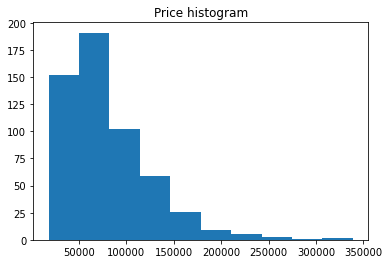

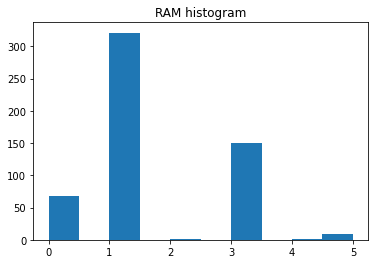

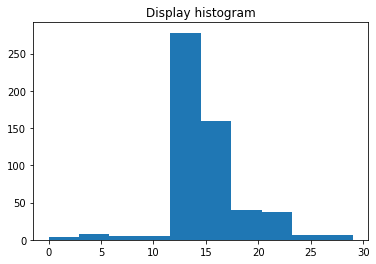

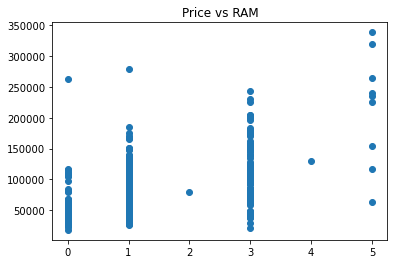

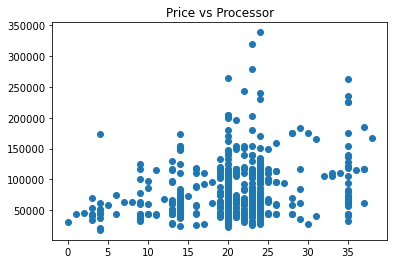

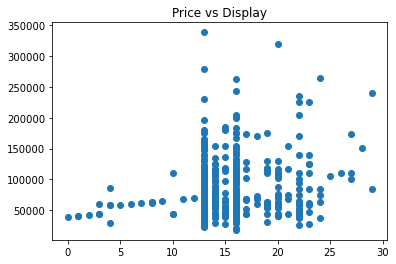

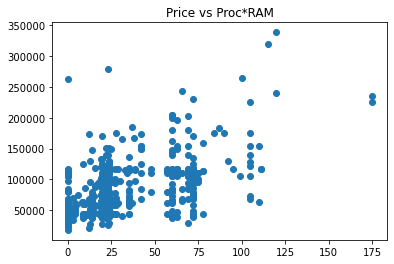

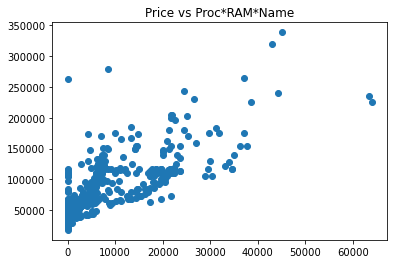

In [10]:
from matplotlib import pyplot as plt
plt.hist(data_frame.Price)
plt.title("Price histogram")
plt.show()
plt.hist(data_frame.RAM)
plt.title("RAM histogram")
plt.show()
plt.hist(data_frame.Display)
plt.title("Display histogram")
plt.show()
plt.scatter(data_frame.RAM, data_frame.Price)
plt.title("Price vs RAM")
plt.show()
plt.scatter(data_frame.Processor, data_frame.Price)
plt.title("Price vs Processor")
plt.show()
plt.scatter(data_frame.Display, data_frame.Price)
plt.title("Price vs Display")
plt.show()
plt.scatter(data_frame.Processor*data_frame.RAM, data_frame.Price)
plt.title("Price vs Proc*RAM")
plt.show()
plt.scatter(data_frame.Processor*data_frame.RAM*data_frame.Name,data_frame.Price)
plt.title("Price vs Proc*RAM*Name")
plt.show()

In [11]:
#seprating target varaible from features
Target = data_frame['Price']
features = data_frame.drop(columns='Price')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

a = scaler.fit_transform(features)
features = pd.DataFrame(a)
features.head(10)

0         1         2         3         4         5
0 -1.118237  0.489478 -0.442340 -1.119289 -0.537058 -0.065004
1 -1.108974 -1.055946 -0.442340  1.214773  1.334140 -0.065004
2 -1.581405 -3.219538 -0.442340  1.214773  0.264884 -0.065004
3 -1.294241 -1.055946 -0.442340  1.214773  0.264884 -0.065004
4 -1.674038  1.416732 -1.336778 -1.119289 -0.537058 -0.065004
5 -1.173817  0.489478 -0.442340 -1.119289 -0.537058 -0.065004
6 -0.877390 -1.210488 -0.442340 -1.119289 -0.537058 -0.065004
7  1.142019 -0.128692  1.346536  0.047742 -0.537058 -0.065004
8 -1.442454  0.180393 -0.442340 -1.119289 -0.537058 -0.065004
9 -1.479508 -1.828657 -0.442340 -1.119289 -0.537058 -0.065004

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, Target, test_size=0.3, random_state=42,shuffle = True)

In [14]:
from sklearn.ensemble import RandomForestRegressor
Random_forest_regressor = RandomForestRegressor(random_state=10)
Random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=10)

In [15]:
print("Training score")
print(Random_forest_regressor.score(X_train,y_train))
print('\r')
print("Testing score accuracy")
print(Random_forest_regressor.score(X_test,y_test))


Training score
0.998378156909143

Testing score accuracy
0.9900032033608583
